<a href="https://colab.research.google.com/github/PavloZakala/CNN/blob/main/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization

$y = Wx$

* Inputs x are not centered around zero (need large bias)
* Inputs x have different scaling per-element
(entries in W will need to vary a lot)

<img src="https://i.sstatic.net/sQR7B.png" alt="drawing" width="1000"/>

In [1]:
import torch
from torch import nn

from matplotlib import pyplot as plt

def show_torch_array(img, channel=0):
    plt.imshow(img[0, :, :].numpy())

    c, h, w = img.shape
    for i in range(w):
        for j in range(h):
            plt.text(j, i, f"{float(img[channel, i, j]):.2f}", ha="center", va="center", color="w", fontsize=7)
    plt.show()

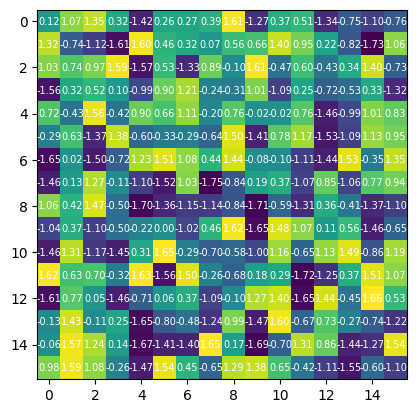

tensor(0.0011)


In [2]:
# https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
batch_norm = torch.nn.BatchNorm2d(4, affine=False, momentum=None)

# ones_image = torch.ones(3, 4, 16, 16) + torch.eye(16).unsqueeze(0)
# show_torch_array(ones_image[0])
# out = batch_norm(ones_image)

# with torch.no_grad():
#   show_torch_array(out[0])

rand_image = torch.rand(3, 4, 16, 16)
rand_image.requires_grad = False

# with torch.no_grad():
#   show_torch_array(rand_norm_out[0])

rand_norm_out = batch_norm(rand_image)

with torch.no_grad():
  show_torch_array(rand_norm_out[0])

own_out = torch.zeros_like(rand_norm_out)
for i in range(4):
  x = rand_norm_out[:, i]
  own_out[:, i] = (x - torch.mean(x)) / (torch.std(x) + 1e-5)

print((own_out - rand_norm_out).max())

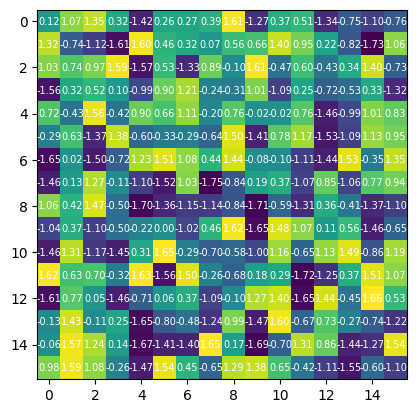

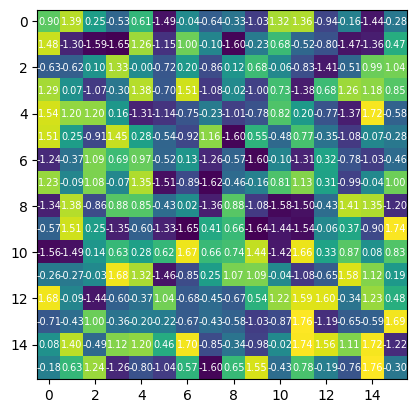

tensor(0.0008, grad_fn=<MaxBackward1>)


In [3]:
# https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html
layer_norm = torch.nn.LayerNorm([4, 16, 16])

# ones_image = torch.ones(1, 16, 16) + torch.eye(16)
# show_torch_array(ones_image)

# out = layer_norm(ones_image.unsqueeze(0))
# with torch.no_grad():
#   show_torch_array(out[0])

rand_image = torch.rand(3, 4, 16, 16)
rand_image.requires_grad = False

with torch.no_grad():
  show_torch_array(rand_norm_out[0])

rand_norm_out = layer_norm(rand_image)

with torch.no_grad():
  show_torch_array(rand_norm_out[0])

own_out = torch.zeros_like(rand_norm_out)
for i in range(3):
  x = rand_norm_out[i]
  own_out[i] = (x - torch.mean(x)) / (torch.std(x) + 1e-5)

print((own_out - rand_norm_out).max())

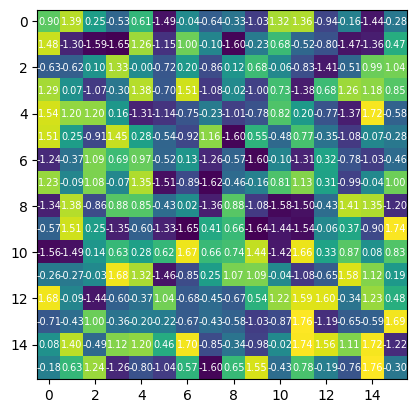

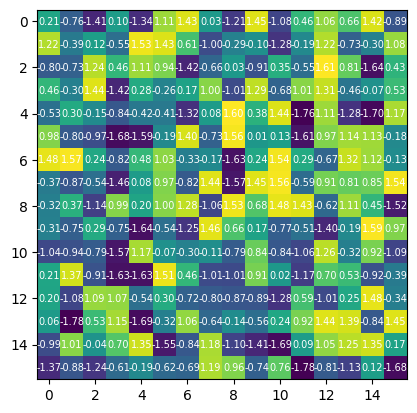

tensor(0.0035, grad_fn=<MaxBackward1>)


In [4]:
# https://pytorch.org/docs/stable/generated/torch.nn.GroupNorm.html
instance_norm = torch.nn.GroupNorm(4, 4)

# ones_image = torch.ones(1, 16, 16) + torch.eye(16)
# show_torch_array(ones_image)

# out = instance_norm(ones_image.unsqueeze(0))
# with torch.no_grad():
#   show_torch_array(out[0])

rand_image = torch.rand(3, 4, 16, 16)
rand_image.requires_grad = False

with torch.no_grad():
  show_torch_array(rand_norm_out[0])

rand_norm_out = instance_norm(rand_image)

with torch.no_grad():
  show_torch_array(rand_norm_out[0])

own_out = torch.zeros_like(rand_norm_out)
for i in range(3):
  for j in range(4):
    x = rand_norm_out[i, j]
    own_out[i, j] = (x - torch.mean(x)) / (torch.std(x) + 1e-5)

print((own_out - rand_norm_out).max())

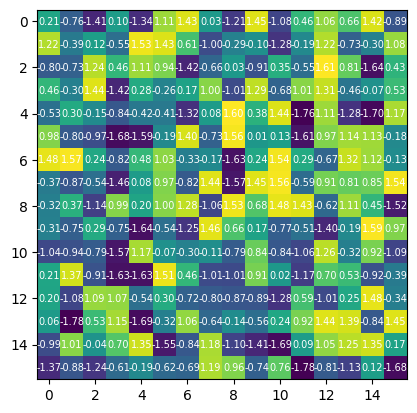

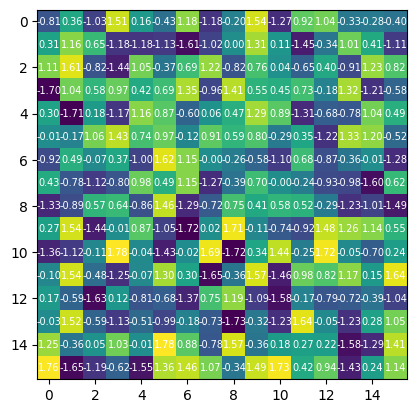

tensor(0.0017, grad_fn=<MaxBackward1>)


In [5]:
# https://pytorch.org/docs/stable/generated/torch.nn.GroupNorm.html
group_norm = torch.nn.GroupNorm(2, 4)

# ones_image = torch.ones(1, 16, 16) + torch.eye(16)
# show_torch_array(ones_image)

# out = group_norm(ones_image.unsqueeze(0))
# with torch.no_grad():
#   show_torch_array(out[0])

rand_image = torch.rand(3, 4, 16, 16)
rand_image.requires_grad = False

with torch.no_grad():
  show_torch_array(rand_norm_out[0])

rand_norm_out = group_norm(rand_image)

with torch.no_grad():
  show_torch_array(rand_norm_out[0])

own_out = torch.zeros_like(rand_norm_out)
for i in range(3):
  for j in range(2):
    x = rand_norm_out[i, 4 // 2 * j: 4 // 2 * (j+1)]
    own_out[i,  4 // 2 * j: 4 // 2 * (j+1)] = (x - torch.mean(x)) / (torch.std(x) + 1e-5)

print((own_out - rand_norm_out).max())

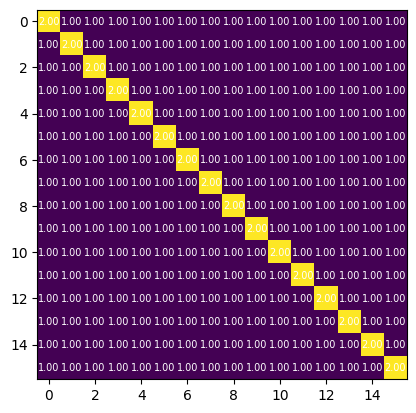

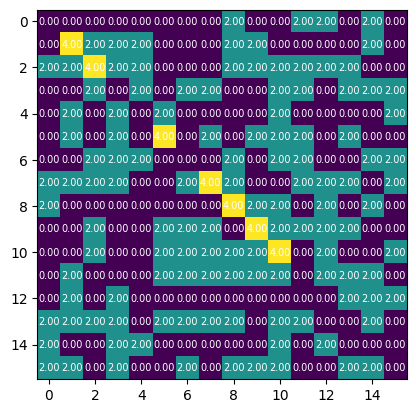

In [6]:
# https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

drop_out = torch.nn.Dropout(p=0.5)

ones_image = torch.ones(1, 16, 16) + torch.eye(16)
show_torch_array(ones_image)

out = drop_out(ones_image.unsqueeze(0))
with torch.no_grad():
  show_torch_array(out[0])